In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Setting Spotipy API

In [2]:
SPOTIPY_CLIENT_ID = ''
SPOTIPY_CLIENT_SECRET= ""
auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

### Searching for songs

Search method returns the best n possible songs to given input. A good part of this method is it returns songs with high popularity before songs with less popularity.

We defined most possible characters to be initial character of a song name. With A-Z, 0-9 We got 35 characters.
Search method allowed us to get maximum of 50 songs per search. So we got 50 x 35 = 1750 songs.

In [3]:
all_letters = 'a b c d e f g h i j k l m n o p r s t u y z q x w 0 1 2 3 4 5 6 7 8 9'
starts = all_letters.split()
print(starts)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'y', 'z', 'q', 'x', 'w', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Further information about the features :
https://developer.spotify.com/documentation/

https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/


In [4]:
def get_features(tr_id):
    meta = sp.track(tr_id)
    features = sp.audio_features(tr_id)
    
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    
    track = [name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track

In [5]:
def get_songs():
    tracks = []
    for i in starts:
        song=sp.search(i,limit=50)
        for j in range(50):
            tr_id = song['tracks']['items'][j]['id']
            track = get_features(tr_id)
            tracks.append(track)
    df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
    return df

In [6]:
df = get_songs()
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Anyone,Anyone,Justin Bieber,2021-01-01,190779,92,0.686,0.18100,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4
1,Therefore I Am,Therefore I Am,Billie Eilish,2020-11-12,174321,93,0.889,0.21800,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4
2,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,165819,86,0.671,0.07690,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
3,34+35,Positions,Ariana Grande,2020-10-30,173710,93,0.830,0.23700,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4
4,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,241106,89,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,9と4分の3番線で君を待つ (Run Away) - Japanese Ver.,STILL DREAMING,TOMORROW X TOGETHER,2021-01-19,210893,44,0.629,0.00606,0.791,0.000000,0.1260,-4.308,0.1010,128.982,4
1746,We Don't Talk Anymore (feat. Selena Gomez),Nine Track Mind,Charlie Puth,2016-01-29,217706,67,0.728,0.62100,0.563,0.000000,0.1790,-8.053,0.1340,100.017,4
1747,929,Manic,Halsey,2020-01-17,174806,58,0.642,0.93500,0.317,0.000000,0.2070,-9.325,0.1550,150.152,4
1748,Coffee (feat. Marc E. Bassy),A Letter To My Younger Self,Quinn XCII,2020-07-10,180053,69,0.831,0.08030,0.452,0.000000,0.3590,-5.111,0.0470,93.040,4


In [7]:
df.shape

(1750, 15)

### Storing the data

We took the data from Spotipy once, then stored it as csv file to use in further parts of the project.

In [8]:
df.to_csv("spotify_data.csv", sep=',')

In [9]:
df = pd.read_csv("spotify_data.csv")

### First Observations

In [10]:
df

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,Anyone,Anyone,Justin Bieber,2021-01-01,190779,92,0.686,0.18100,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4
1,1,Therefore I Am,Therefore I Am,Billie Eilish,2020-11-12,174321,93,0.889,0.21800,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4
2,2,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,165819,86,0.671,0.07690,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
3,3,34+35,Positions,Ariana Grande,2020-10-30,173710,93,0.830,0.23700,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4
4,4,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,241106,89,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1745,9と4分の3番線で君を待つ (Run Away) - Japanese Ver.,STILL DREAMING,TOMORROW X TOGETHER,2021-01-19,210893,44,0.629,0.00606,0.791,0.000000,0.1260,-4.308,0.1010,128.982,4
1746,1746,We Don't Talk Anymore (feat. Selena Gomez),Nine Track Mind,Charlie Puth,2016-01-29,217706,67,0.728,0.62100,0.563,0.000000,0.1790,-8.053,0.1340,100.017,4
1747,1747,929,Manic,Halsey,2020-01-17,174806,58,0.642,0.93500,0.317,0.000000,0.2070,-9.325,0.1550,150.152,4
1748,1748,Coffee (feat. Marc E. Bassy),A Letter To My Younger Self,Quinn XCII,2020-07-10,180053,69,0.831,0.08030,0.452,0.000000,0.3590,-5.111,0.0470,93.040,4


We saw there is an unneccesary "Unnamed: 0" column and dropped it.

In [11]:
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1750 non-null   object 
 1   album             1750 non-null   object 
 2   artist            1750 non-null   object 
 3   release_date      1750 non-null   object 
 4   length            1750 non-null   int64  
 5   popularity        1750 non-null   int64  
 6   danceability      1750 non-null   float64
 7   acousticness      1750 non-null   float64
 8   energy            1750 non-null   float64
 9   instrumentalness  1750 non-null   float64
 10  liveness          1750 non-null   float64
 11  loudness          1750 non-null   float64
 12  speechiness       1750 non-null   float64
 13  tempo             1750 non-null   float64
 14  time_signature    1750 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 205.2+ KB


Checked if there are any missing values.
The data is full.

In [12]:
df.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,195436.638286,69.506286,0.651688,0.298371,0.592553,0.053457,0.177332,-7.867144,0.118890,122.115411,3.932000
std,47465.014667,24.158489,0.175828,0.301546,0.205806,0.195213,0.129798,5.190363,0.112192,31.493535,0.396459
min,34533.000000,0.000000,0.000000,0.000035,0.000020,0.000000,0.032700,-40.449000,0.000000,0.000000,0.000000
25%,167280.500000,68.000000,0.553250,0.051825,0.479000,0.000000,0.101000,-8.440250,0.040200,94.736000,4.000000
50%,193838.000000,77.000000,0.671000,0.183000,0.623000,0.000000,0.125000,-6.522000,0.064850,123.049500,4.000000
75%,222346.000000,83.000000,0.779000,0.499000,0.739750,0.000095,0.213750,-5.131750,0.160000,143.929000,4.000000
max,530253.000000,100.000000,0.980000,0.996000,0.997000,1.000000,0.945000,-1.465000,0.777000,211.968000,5.000000


Length column is not human-friendly because it is in milliseconds.

In [13]:
df['length'] = df['length'] / 60000

### Dropping songs with popularity below 60

In [14]:
df.sort_values("popularity", ascending=True)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
246,Easy,Perreo En Los Venas Vol. 5,Various Artists,2021-01-25,3.989550,0,0.853,0.0972,0.777,0.000501,0.3320,-4.025,0.0689,94.023,4
109,Cuando Tú Quieras,Perreo En Los Venas Vol. 5,Various Artists,2021-01-25,3.418667,0,0.696,0.3610,0.668,0.003800,0.3110,-5.063,0.1990,184.332,4
698,No Es Justo,Domingo De Reggaeton,Various Artists,2021-01-22,4.187767,0,0.811,0.1510,0.812,0.000362,0.1520,-4.470,0.0635,87.980,4
1345,Blanco,Perreo En Las Venas Vol. 1,Various Artists,2021-01-22,2.432667,0,0.876,0.0270,0.712,0.007980,0.0863,-5.399,0.1480,100.006,4
1213,What Do You Mean?,Gym Motivation 2021,Various Artists,2021-01-25,3.475700,0,0.832,0.5850,0.631,0.000892,0.0838,-6.190,0.0736,125.038,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Mood (feat. iann dior),Mood (feat. iann dior),24kGoldn,2020-07-24,2.342083,96,0.700,0.2210,0.722,0.000000,0.2720,-3.558,0.0369,90.989,4
701,drivers license,drivers license,Olivia Rodrigo,2021-01-08,4.033550,100,0.585,0.7210,0.436,0.000013,0.1050,-8.761,0.0601,143.874,4
551,drivers license,drivers license,Olivia Rodrigo,2021-01-08,4.033550,100,0.585,0.7210,0.436,0.000013,0.1050,-8.761,0.0601,143.874,4
150,drivers license,drivers license,Olivia Rodrigo,2021-01-08,4.033550,100,0.585,0.7210,0.436,0.000013,0.1050,-8.761,0.0601,143.874,4


We saw there are many songs with low popularity, even with 0.
We did a mask to get rid of songs with low popularity because they are irrelevant to our mission.

In [15]:
df= df[df["popularity"] > 60]

### Dropping duplicate songs

Also, there are duplicate songs.

In [16]:
df.sort_values("name", ascending=False)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
923,‘tis the damn season,evermore,Taylor Swift,2020-12-11,3.830667,81,0.575,0.7350,0.4340,0.000066,0.1050,-8.193,0.0312,145.916,4
1012,you were good to me,brent,Jeremy Zucker,2019-05-03,3.652433,81,0.561,0.9130,0.0848,0.000026,0.1120,-15.099,0.0404,102.128,4
1378,you were good to me,brent,Jeremy Zucker,2019-05-03,3.652433,81,0.561,0.9130,0.0848,0.000026,0.1120,-15.099,0.0404,102.128,4
1068,you were good to me,brent,Jeremy Zucker,2019-05-03,3.652433,81,0.561,0.9130,0.0848,0.000026,0.1120,-15.099,0.0404,102.128,4
1038,you should see me in a crown,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,2019-03-29,3.015867,79,0.678,0.4620,0.5330,0.219000,0.1390,-10.485,0.1860,150.455,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,"0 Sentimientos (Remix) [feat. Noriel, Darkiel,...","0 Sentimientos (Remix) [feat. Noriel, Darkiel,...",Jon Z,2016-11-24,5.595600,66,0.894,0.1550,0.7210,0.000000,0.1540,-5.829,0.2580,107.963,4
25,"...And To Those I Love, Thanks For Sticking Ar...",STOP STARING AT THE SHADOWS,$uicideBoy$,2020-02-14,2.808150,80,0.792,0.1300,0.5120,0.000088,0.1400,-6.875,0.0408,113.978,4
1386,"...And To Those I Love, Thanks For Sticking Ar...",STOP STARING AT THE SHADOWS,$uicideBoy$,2020-02-14,2.808150,80,0.792,0.1300,0.5120,0.000088,0.1400,-6.875,0.0408,113.978,4
995,"...And To Those I Love, Thanks For Sticking Ar...",STOP STARING AT THE SHADOWS,$uicideBoy$,2020-02-14,2.808150,80,0.792,0.1300,0.5120,0.000088,0.1400,-6.875,0.0408,113.978,4


In [17]:
df.drop_duplicates(keep='first', inplace=True)
df.sort_values("name", ascending=False)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
923,‘tis the damn season,evermore,Taylor Swift,2020-12-11,3.830667,81,0.575,0.7350,0.4340,0.000066,0.1050,-8.193,0.0312,145.916,4
1012,you were good to me,brent,Jeremy Zucker,2019-05-03,3.652433,81,0.561,0.9130,0.0848,0.000026,0.1120,-15.099,0.0404,102.128,4
1038,you should see me in a crown,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,2019-03-29,3.015867,79,0.678,0.4620,0.5330,0.219000,0.1390,-10.485,0.1860,150.455,4
63,you broke me first,you broke me first,Tate McRae,2020-04-17,2.821083,92,0.642,0.7860,0.3740,0.000000,0.0906,-9.386,0.0545,124.099,4
1152,xanny,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,2019-03-29,4.062083,75,0.521,0.7510,0.1250,0.002070,0.2650,-17.832,0.2390,111.554,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,000000,EXOTIGAZ,A.CHAL,2018-12-08,2.753567,62,0.734,0.4940,0.4720,0.002930,0.1020,-8.192,0.3060,190.011,4
1250,0 To 100 / The Catch Up,0 To 100 / The Catch Up,Drake,2013-07-14,4.587100,70,0.559,0.7370,0.7160,0.000000,0.2520,-3.964,0.3900,176.618,4
1261,"0 Sentimientos (Remix) [feat. Noriel, Darkiel,...","0 Sentimientos (Remix) [feat. Noriel, Darkiel,...",Jon Z,2016-11-24,5.595600,66,0.894,0.1550,0.7210,0.000000,0.1540,-5.829,0.2580,107.963,4
25,"...And To Those I Love, Thanks For Sticking Ar...",STOP STARING AT THE SHADOWS,$uicideBoy$,2020-02-14,2.808150,80,0.792,0.1300,0.5120,0.000088,0.1400,-6.875,0.0408,113.978,4


After dropping songs with low popularity and duplicates, There are 951 songs remaining.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 1748
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              951 non-null    object 
 1   album             951 non-null    object 
 2   artist            951 non-null    object 
 3   release_date      951 non-null    object 
 4   length            951 non-null    float64
 5   popularity        951 non-null    int64  
 6   danceability      951 non-null    float64
 7   acousticness      951 non-null    float64
 8   energy            951 non-null    float64
 9   instrumentalness  951 non-null    float64
 10  liveness          951 non-null    float64
 11  loudness          951 non-null    float64
 12  speechiness       951 non-null    float64
 13  tempo             951 non-null    float64
 14  time_signature    951 non-null    int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 118.9+ KB


### Analysis

Looking at the shape of our data

<Figure size 1440x1008 with 0 Axes>

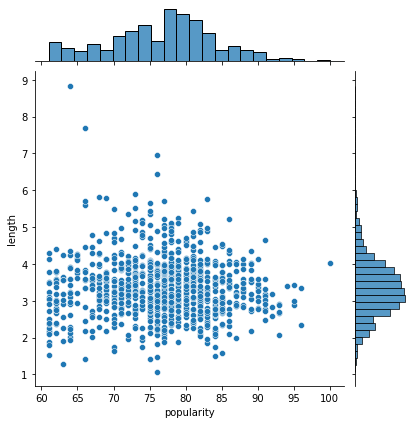

In [19]:
plt.figure(figsize=(20, 14))
ax = sns.jointplot(x=df.popularity,y=df["length"],data=df)

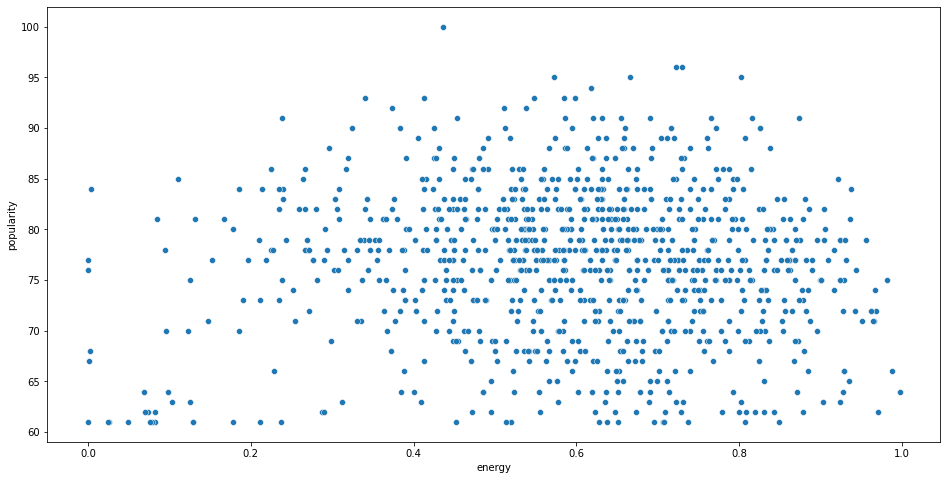

In [20]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x=df.energy, y=df.popularity,data=df)

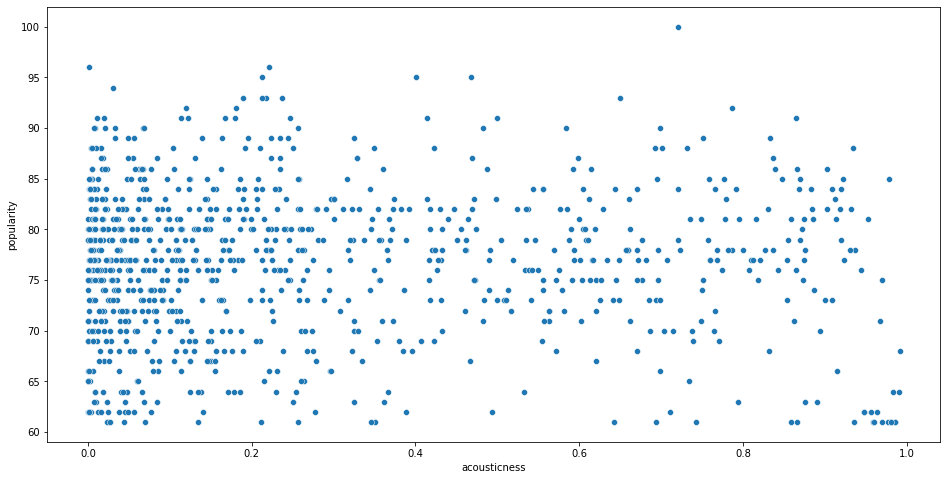

In [21]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x=df.acousticness, y=df.popularity,data=df)

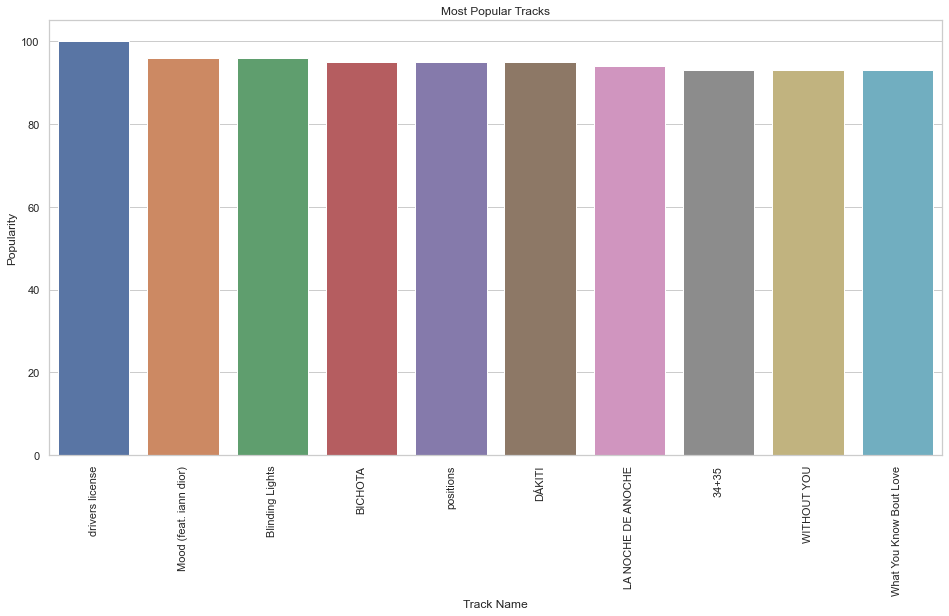

In [22]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x=x.index, y=x)
ax.set_title('Most Popular Tracks')
ax.set_ylabel('Popularity')
ax.set_xlabel('Track Name')
plt.xticks(rotation = 90)
plt.show()

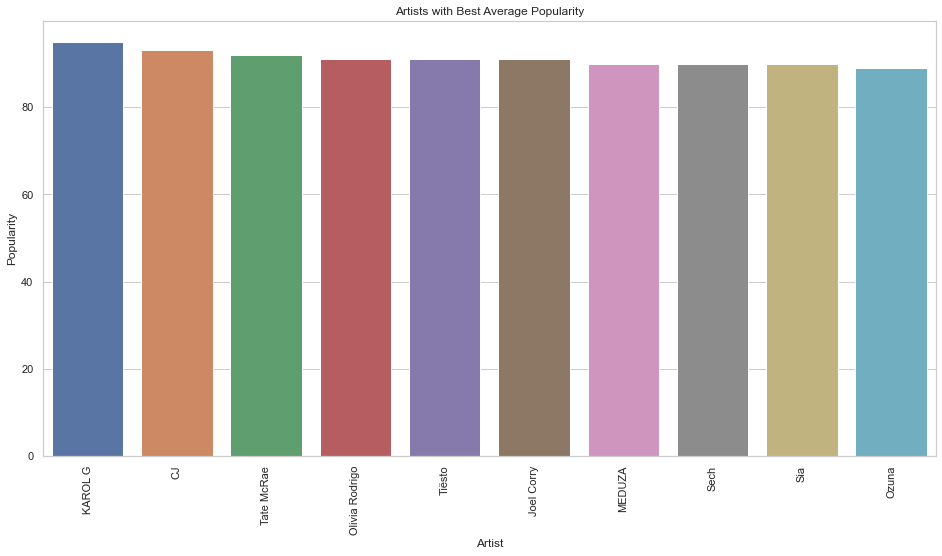

In [23]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("artist")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x=x.index, y=x)
ax.set_title('Artists with Best Average Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artist')
plt.xticks(rotation = 90)
plt.show()

<Figure size 1152x576 with 0 Axes>

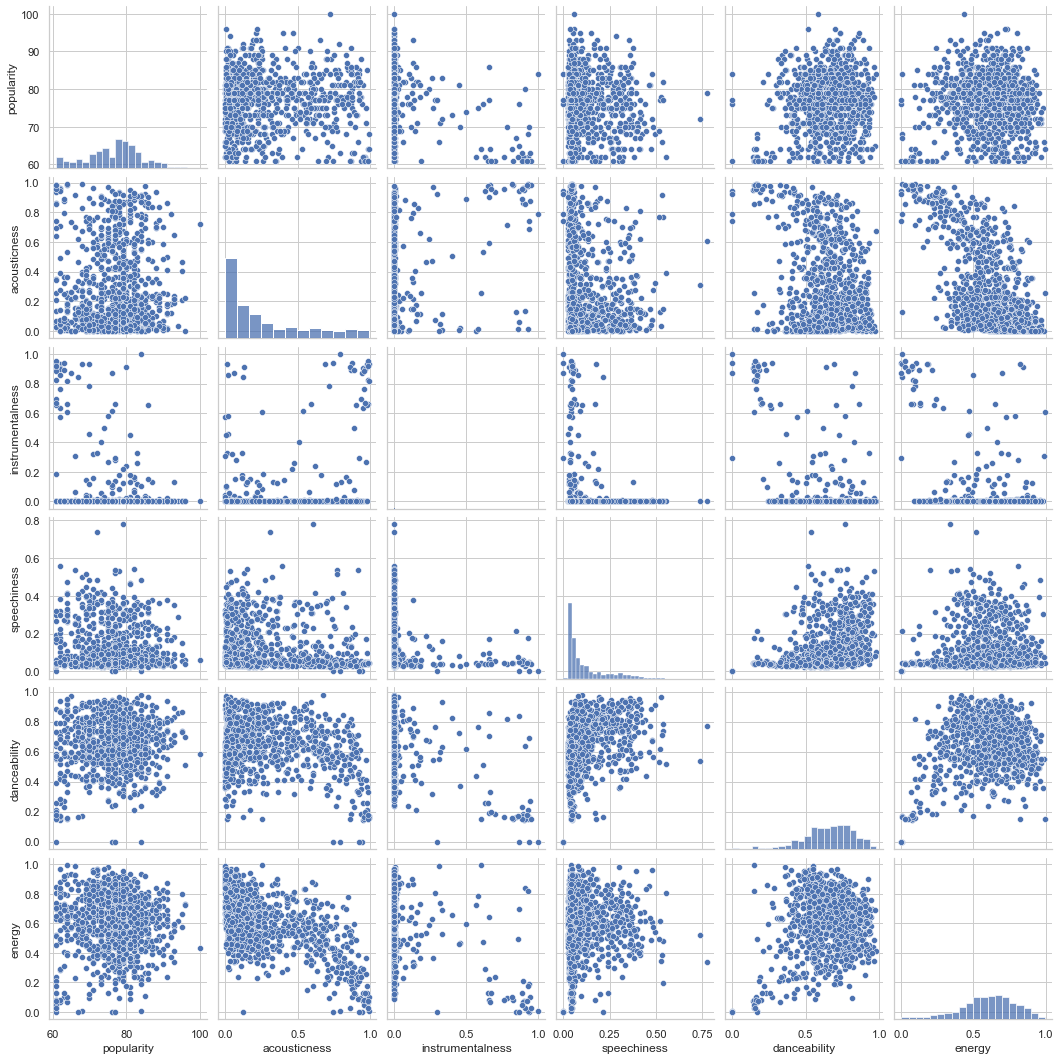

In [24]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["popularity","acousticness","instrumentalness","speechiness","danceability","energy"]
sns.pairplot(df[cols], height = 2.5 )
plt.show()

### Plotting the correlation between features

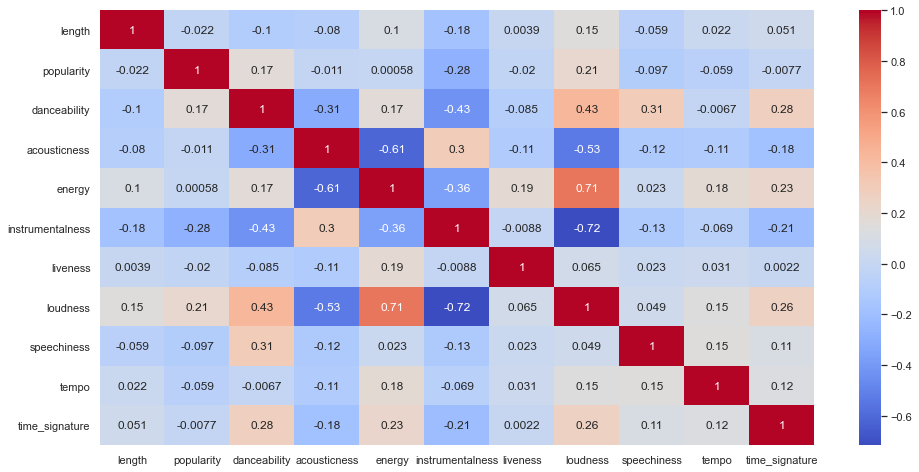

In [25]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

### Preprocessing

Dropping features we won't use in Clustering.
Popularity is not necessary because we are inspecting ONLY popular songs.

In [26]:
df2 = df.drop(['release_date','name','album','artist',"popularity"],axis=1)
df2

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,3.179650,0.686,0.18100,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4
1,2.905350,0.889,0.21800,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4
2,2.763650,0.671,0.07690,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
3,2.895167,0.830,0.23700,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4
4,4.018433,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4
...,...,...,...,...,...,...,...,...,...,...
1735,3.819550,0.285,0.00103,0.843,0.000370,0.3270,-7.318,0.1290,97.051,4
1739,3.365333,0.458,0.00184,0.779,0.000043,0.3130,-8.312,0.0486,99.093,4
1742,3.192667,0.405,0.08430,0.689,0.000000,0.2070,-5.750,0.0365,155.189,4
1746,3.628433,0.728,0.62100,0.563,0.000000,0.1790,-8.053,0.1340,100.017,4


### Scaling the features

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

$$
z = \frac{(x - \mu)} {s}
$$


$\mu$ = mean, s = standart deviation

In [27]:
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df2

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,-0.226499,0.191631,-0.339247,-0.305794,-0.244419,-0.485269,-0.105730,-0.732304,-0.210478,0.165406
1,-0.569581,1.382023,-0.209750,-1.326627,0.562230,-0.908050,-0.049343,-0.429965,-0.908853,0.165406
2,-0.746813,0.103671,-0.703590,-0.352196,-0.242359,-0.684997,0.072569,1.608248,1.261457,0.165406
3,-0.582318,1.036047,-0.143251,-0.063475,-0.244438,0.498790,0.239724,-0.221248,-0.399031,0.165406
4,0.822612,-1.860769,-0.398746,0.153065,-0.244438,-0.792879,0.019748,-0.698806,0.887415,0.165406
...,...,...,...,...,...,...,...,...,...,...
946,0.573858,-2.159833,-0.969130,1.266701,-0.242142,1.074647,0.052065,0.079374,-0.811735,0.165406
947,0.005745,-1.145361,-0.966295,0.936735,-0.244173,0.972597,-0.169471,-0.611196,-0.746542,0.165406
948,-0.210219,-1.456153,-0.677691,0.472720,-0.244438,0.199928,0.401530,-0.715126,1.044362,0.165406
949,0.334818,0.437919,1.200722,-0.176901,-0.244438,-0.004174,-0.111747,0.122319,-0.717043,0.165406


### Clustering

In [28]:
wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters=i, init='k-means++',n_init=10, max_iter=1000, random_state=42)
    model.fit(df2)
    wcss.append(model.inertia_)
    #Within-Cluster-Sum-of-Squares (WCSS)

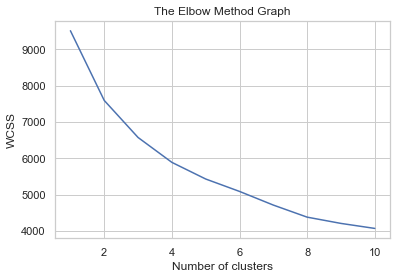

In [29]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We decided to choose 4 as our K.
Trained our model for the last time and predicted the clusters.

In [30]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=500, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(df2)

Added cluster information to the dataframe.

In [31]:
df['cluster'] = y_kmeans
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,Anyone,Anyone,Justin Bieber,2021-01-01,3.179650,92,0.686,0.18100,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4,2
1,Therefore I Am,Therefore I Am,Billie Eilish,2020-11-12,2.905350,93,0.889,0.21800,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4,3
2,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,2.763650,86,0.671,0.07690,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4,0
3,34+35,Positions,Ariana Grande,2020-10-30,2.895167,93,0.830,0.23700,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4,2
4,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,4.018433,89,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,99 Red Balloons,Stomping Ground,Goldfinger,2000-03-28,3.819550,62,0.285,0.00103,0.843,0.000370,0.3270,-7.318,0.1290,97.051,4,2
1739,96 Quite Bitter Beings,"Camp Kill Yourself, Vol.1",CKY,1999-01-01,3.365333,62,0.458,0.00184,0.779,0.000043,0.3130,-8.312,0.0486,99.093,4,2
1742,Nine in the Afternoon - Single Mix,Pretty. Odd.,Panic! At The Disco,2008-03-21,3.192667,63,0.405,0.08430,0.689,0.000000,0.2070,-5.750,0.0365,155.189,4,2
1746,We Don't Talk Anymore (feat. Selena Gomez),Nine Track Mind,Charlie Puth,2016-01-29,3.628433,67,0.728,0.62100,0.563,0.000000,0.1790,-8.053,0.1340,100.017,4,3


In [32]:
clus_0 =df[df["cluster"] == 0]
clus_1 =df[df["cluster"] == 1] 
clus_2 =df[df["cluster"] == 2] 
clus_3 =df[df["cluster"] == 3] 

It seems like some clusters are more popular than other in our data.

In [33]:
df.cluster.value_counts()

2    491
3    233
0    197
1     30
Name: cluster, dtype: int64

In [36]:
df_result = pd.DataFrame(clus_0.mean(), columns=['Rap'])
df_result.insert(1, "New Age", clus_1.mean())
df_result.insert(2, "Pop", clus_2.mean())
df_result.insert(3, "Alternative", clus_3.mean())

Mean of audio features of all clusters.
We observed clusters have some identical features.

Cluster 1 has very high instrumentalness comparing to others. Its tempo, danceability, energy, loudness are lower.
It also has high acousticness, We decided to name this cluster New Age.

Cluster 0 has very high speechiness comparing to others. Its tempo is the highest too. We can clearly name this cluster Rap.

Cluster 2 and Cluster 3 have some similar features, we can say this two look like Pop. But their acousticness are very different as well as their energy. Cluster 3 has significantly less energy and high acousticness than Cluster 2. We named Cluster 3 as Alternative.

Cluster 2 is mostly consists of high energy pop songs, Its tempo is high too. We named this cluster Pop.

In [37]:
df_result

,Rap,New Age,Pop,Alternative
length,3.178527,2.310758,3.394359,3.579146
popularity,75.908629,64.466667,76.898167,78.240343
danceability,0.769995,0.201600,0.658104,0.602755
acousticness,0.189174,0.806987,0.133106,0.590041
energy,0.595832,0.157878,0.702780,0.432888
instrumentalness,0.004353,0.817500,0.013951,0.022448
liveness,0.174229,0.169287,0.198264,0.146025
loudness,-7.035797,-27.088967,-5.766242,-9.234472
speechiness,0.308244,0.054730,0.072174,0.069045
tempo,134.213949,105.548033,123.841662,111.856382


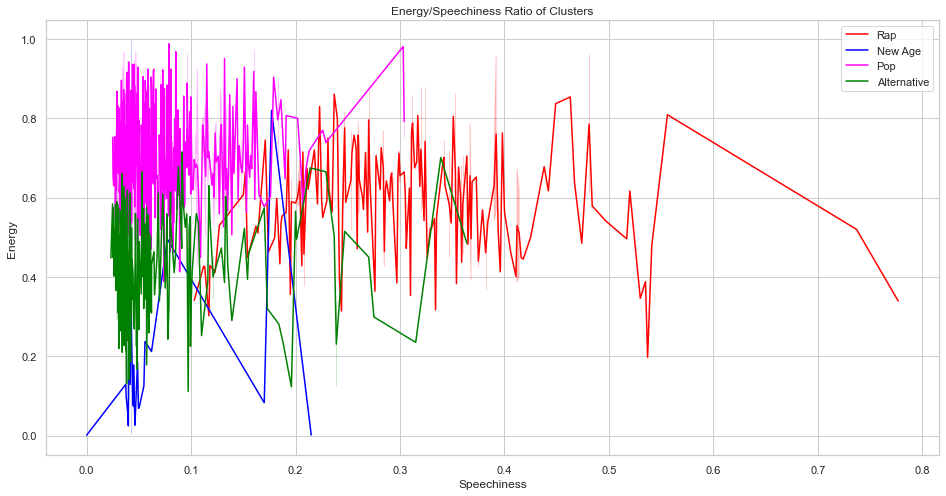

In [39]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = [clus_0, clus_1, clus_2, clus_3]
labels = ["Rap", "New Age", "Pop", "Alternative"]
colors = ['red','blue','magenta','green']
for i in range(len(columns)):
    ax= sns.lineplot(x=columns[i]['speechiness'],y=columns[i]['energy'], label=labels[i], color=colors[i])
ax.set_title('Energy/Speechiness Ratio of Clusters')
ax.set_ylabel('Energy')
ax.set_xlabel('Speechiness')
plt.show()

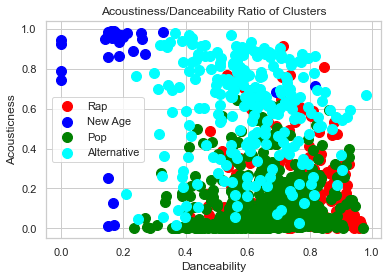

In [40]:
plt.scatter(clus_0['danceability'], clus_0['acousticness'], s=100, c='red', label ='Rap')
plt.scatter(clus_1['danceability'], clus_1['acousticness'], s=100, c='blue', label ='New Age')
plt.scatter(clus_2['danceability'], clus_2['acousticness'], s=100, c='green', label ='Pop')
plt.scatter(clus_3['danceability'], clus_3['acousticness'], s=100, c='cyan', label ='Alternative')
plt.title('Acoustiness/Danceability Ratio of Clusters')
plt.xlabel('Danceability')
plt.ylabel('Acousticness')
plt.legend()
plt.show()

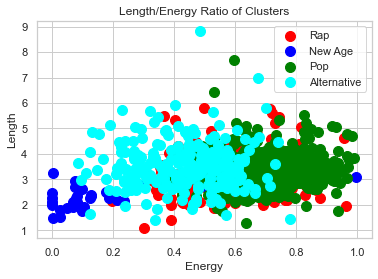

In [41]:
plt.scatter(clus_0['energy'], clus_0['length'], s=100, c='red', label ='Rap')
plt.scatter(clus_1['energy'], clus_1['length'], s=100, c='blue', label ='New Age')
plt.scatter(clus_2['energy'], clus_2['length'], s=100, c='green', label ='Pop')
plt.scatter(clus_3['energy'], clus_3['length'], s=100, c='cyan', label ='Alternative')
plt.title('Length/Energy Ratio of Clusters')
plt.xlabel('Energy')
plt.ylabel('Length')
plt.legend()
plt.show()

Rap Cluster: As predicted, rap songs lead this cluster.

In [42]:
clus_0 

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
2,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,2.763650,86,0.671,0.0769,0.529,0.000335,0.0856,-7.226,0.307,161.989,4,0
7,For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,Pop Smoke,2020-07-03,3.174600,91,0.823,0.1140,0.586,0.000000,0.1930,-6.606,0.200,125.971,4,0
18,Armed And Dangerous,Goodbye & Good Riddance,Juice WRLD,2018-12-10,2.833317,80,0.736,0.1860,0.670,0.000000,0.1140,-6.702,0.311,130.032,4,0
19,Martin & Gina,THE GOAT,Polo G,2020-05-15,2.213867,84,0.832,0.3450,0.534,0.000000,0.1650,-7.813,0.253,93.924,4,0
20,ALWAYS DO,F*CK LOVE (SAVAGE),The Kid LAROI,2020-11-06,2.528400,82,0.762,0.0442,0.426,0.000000,0.0858,-6.865,0.113,167.827,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,Motiv8,KOD,J. Cole,2018-04-20,2.232017,64,0.869,0.1350,0.385,0.000000,0.0931,-7.801,0.297,149.897,4,0
1704,911 / Mr. Lonely (feat. Frank Ocean & Steve Lacy),Flower Boy,"Tyler, The Creator",2017-07-21,4.260883,71,0.480,0.0456,0.610,0.000000,0.3130,-7.042,0.305,90.034,4,0
1716,93 'Til Infinity,93 'til Infinity,Souls Of Mischief,1993-02-13,4.774000,67,0.590,0.1250,0.672,0.000001,0.1470,-11.792,0.412,206.247,4,0
1717,La Jeepeta - Remix,La Jeepeta (Remix),Nio Garcia,2020-04-24,5.754000,83,0.815,0.3000,0.715,0.000005,0.0910,-4.650,0.207,176.007,4,0


New Age Cluster: As predicted, consists of rain noises, noises for sleeping etc.

In [43]:
clus_1

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
129,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,Erik Eriksson,2017-01-08,1.503800,84,0.000,0.7910,0.003420,1.000,0.1110,-28.460,0.0000,0.000,0,1
1075,Zen Thunder,Zen Thunder,Zen Master,2020-08-09,2.983333,62,0.149,0.0122,0.820000,0.933,0.8720,-25.268,0.1770,83.354,4,1
1081,ZzzzZ 1.4 kHz,Ocean of White Noise,Wavelab,2020-06-09,2.125000,61,0.000,0.7430,0.000458,0.939,0.1110,-22.879,0.0000,0.000,0,1
1116,Querencia,Querencia,Cameron Sinosa,2020-11-05,3.244133,68,0.170,0.9910,0.003160,0.931,0.1110,-38.615,0.0422,70.964,3,1
1123,Quiet Rain in River,Rain White Noise,Stereo Outdoor Sampling,2019-10-10,2.001383,67,0.166,0.1250,0.001330,0.846,0.2330,-23.291,0.2150,119.669,4,1
1254,08pm rain,rain in gothenburg,pluvia,2020-10-16,3.100000,64,0.150,0.2540,0.997000,0.606,0.9450,-25.282,0.0422,63.671,4,1
1283,Imagination,Imagination,Shiloh Dynasty,2018-06-02,1.746283,70,0.816,0.7150,0.096500,0.785,0.1080,-22.035,0.0379,110.008,5,1
1326,White Noise - 145 hz,Unison,Granular,2017-10-13,2.258050,76,0.000,0.9440,0.000020,0.869,0.1120,-40.449,0.0000,0.000,0,1
1438,396 Hz Let Go of Fear & Guilt,396 Hz Liberating Guilt and Fear,Miracle Tones,2019-10-18,2.158333,61,0.187,0.9350,0.237000,0.698,0.1110,-22.685,0.0558,141.363,4,1
1440,396 Hz Dissolve Negativity,396 Hz Liberating Guilt and Fear,Miracle Tones,2019-10-18,2.185417,61,0.185,0.8660,0.212000,0.895,0.0993,-24.360,0.0621,138.515,4,1


Pop Cluster: shows artists like Justin Bieber & Ariana Grande.

In [44]:
clus_2

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,Anyone,Anyone,Justin Bieber,2021-01-01,3.179650,92,0.686,0.18100,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4,2
3,34+35,Positions,Ariana Grande,2020-10-30,2.895167,93,0.830,0.23700,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4,2
4,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,4.018433,89,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4,2
5,Are You Bored Yet? (feat. Clairo),Nothing Happens,Wallows,2019-03-22,2.966667,84,0.682,0.15600,0.683,0.000023,0.2730,-6.444,0.0287,120.023,4,2
6,After Party,Heaven Or Hell,Don Toliver,2020-03-13,2.798583,83,0.629,0.00981,0.692,0.331000,0.6030,-8.045,0.0376,162.948,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,Cloud 9,Honeymoon,Beach Bunny,2020-02-14,2.455833,66,0.637,0.00167,0.929,0.000026,0.3440,-3.593,0.0491,80.974,4,2
1735,99 Red Balloons,Stomping Ground,Goldfinger,2000-03-28,3.819550,62,0.285,0.00103,0.843,0.000370,0.3270,-7.318,0.1290,97.051,4,2
1739,96 Quite Bitter Beings,"Camp Kill Yourself, Vol.1",CKY,1999-01-01,3.365333,62,0.458,0.00184,0.779,0.000043,0.3130,-8.312,0.0486,99.093,4,2
1742,Nine in the Afternoon - Single Mix,Pretty. Odd.,Panic! At The Disco,2008-03-21,3.192667,63,0.405,0.08430,0.689,0.000000,0.2070,-5.750,0.0365,155.189,4,2


Alternative Cluster:

In [45]:
clus_3

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
1,Therefore I Am,Therefore I Am,Billie Eilish,2020-11-12,2.905350,93,0.889,0.2180,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4,3
8,Afterglow,Afterglow,Ed Sheeran,2020-12-21,3.091433,90,0.641,0.6980,0.324,0.000000,0.3280,-5.851,0.0299,110.184,4,3
13,Rockin' Around The Christmas Tree,Merry Christmas From Brenda Lee,Brenda Lee,1964-10-19,2.104433,86,0.589,0.6140,0.472,0.000000,0.5050,-8.749,0.0502,67.196,4,3
23,"All I Want - From ""High School Musical: The Mu...","All I Want (From ""High School Musical: The Mus...",Olivia Rodrigo,2019-11-27,2.955367,82,0.376,0.0902,0.430,0.000000,0.0912,-6.585,0.0328,77.599,3,3
27,A Holly Jolly Christmas - Single Version,Have A Holly Jolly Christmas,Burl Ives,1965-01-01,2.258883,74,0.683,0.5790,0.375,0.000000,0.0760,-13.056,0.0303,140.467,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,9,3,WILLOW,2014-11-11,4.230000,65,0.597,0.2150,0.495,0.000163,0.1040,-8.674,0.2010,76.991,4,3
1713,NI BIEN NI MAL,X 100PRE,Bad Bunny,2018-12-23,3.936917,74,0.826,0.5560,0.449,0.000018,0.2730,-8.330,0.0674,128.028,4,3
1714,911,Can You Keep a Secret?,Ellise,2018-10-12,3.166667,68,0.698,0.5710,0.611,0.000005,0.0587,-6.754,0.0686,130.098,4,3
1724,Te Boté - Remix,Te Boté (Remix),Nio Garcia,2018-04-13,6.965333,76,0.903,0.5420,0.675,0.000013,0.0595,-3.445,0.2140,96.507,4,3
